In [1]:
import numpy as np
from scipy.linalg import ishermitian
import matplotlib.pyplot as plt
import networkx as nx
import igraph

In [2]:
sz = np.array([[1, 0], [0, -1]])
sx = np.array([[0, 1], [1, 0]])
idty = np.eye(2)

def idty_kron(front_length, back_length, operator):
    return np.kron(np.kron(np.eye(2 ** front_length), operator), np.eye(2 ** back_length))


def pxp_model(n):
    mat = np.zeros((2 ** n, 2 ** n), dtype=float)
    mat += np.kron(np.kron(np.kron(sx, idty - sz), np.eye(2 ** (n - 3))), idty - sz)
    for site in range(n - 2):
        mat += idty_kron(site, n - 3 - site, np.kron(idty - sz, np.kron(sx, idty - sz)))
    mat += np.kron(np.kron(np.kron(idty - sz, np.eye(2 ** (n - 3))), idty - sz), sx)
    return mat


def ising_model(n, h):
    mat = np.zeros((2 ** n, 2 ** n), dtype=float)
    for site in range(n - 1):
        mat += -1 * idty_kron(site, n - 2 - site, np.kron(sz, sz))
        mat += h * idty_kron(site, n - 1 - site, sx)
    mat += h * idty_kron(n - 1, 0, sx)
    return mat

# PXP model

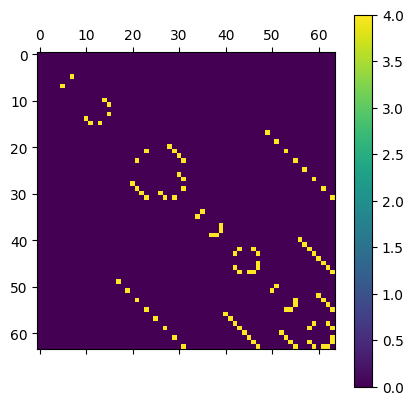

In [3]:
mat = pxp_model(6)
assert ishermitian(mat)

plt.matshow(mat)
plt.colorbar()

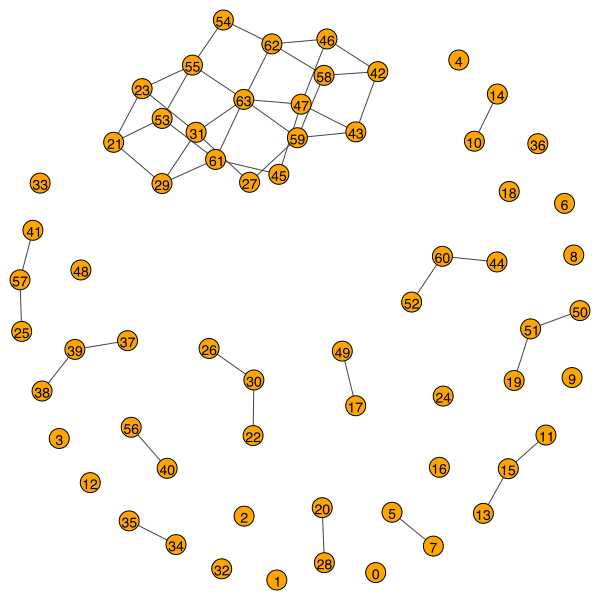

In [4]:
g = nx.from_numpy_array(mat)
ig = igraph.Graph.from_networkx(g)
ig.vs["label"] = [str(i) for i in range(ig.vcount())]
igraph.plot(
    ig,
    layout=ig.layout_kamada_kawai(),
    # vertex_size=8,
    vertex_color="orange",
    # edge_width=0.4,
    # edge_color="darkgray",
    # vertex_label_size=6,
    inline=True
)

In [5]:
sub_components = list(g.subgraph(c) for c in nx.connected_components(g))

nullity = []
for c in sub_components:
    # print(nx.is_bipartite(c))
    cmat = nx.to_numpy_array(c)
    nullity.append(cmat.shape[0] - np.linalg.matrix_rank(cmat))
    
np.unique(nullity, return_counts=True)

(array([0, 1, 4]), array([ 6, 22,  1]))

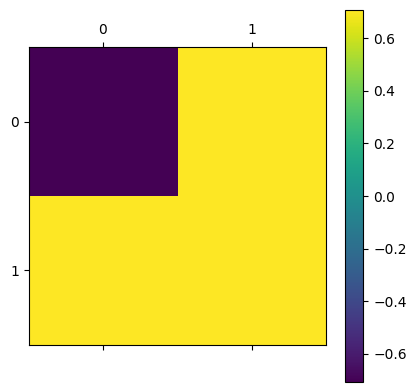

In [6]:
plt.matshow(np.linalg.eigh(nx.to_numpy_array(sub_components[5]))[1])
plt.colorbar()

(array([-14.5211, -10.583 ,  -6.9282,  -5.6569,  -5.3979,  -4.    ,
          0.    ,   4.    ,   5.3979,   5.6569,   6.9282,  10.583 ,
         14.5211]),
 array([ 1,  1,  2,  6,  1,  8, 26,  8,  1,  6,  2,  1,  1]))

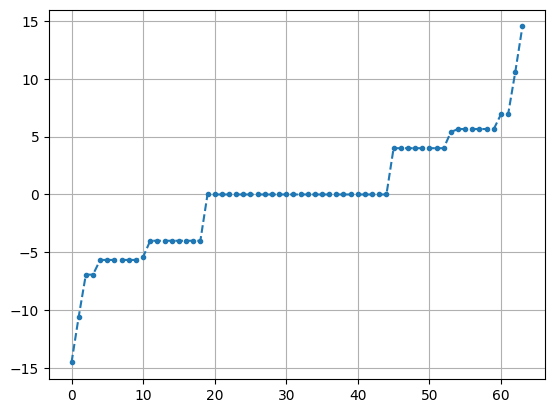

In [7]:
evals, evecs = np.linalg.eigh(mat)
plt.plot(evals, linestyle="--", marker=".")
plt.grid()

np.unique(np.round(evals, 4), return_counts=True)

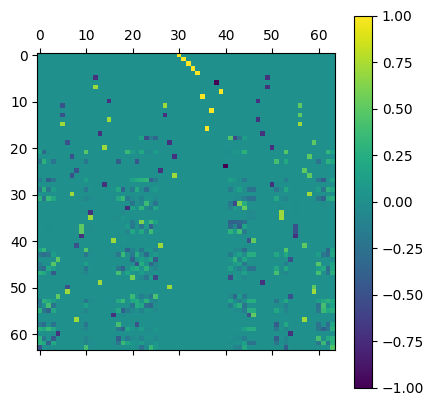

In [8]:
plt.matshow(evecs)
plt.colorbar()

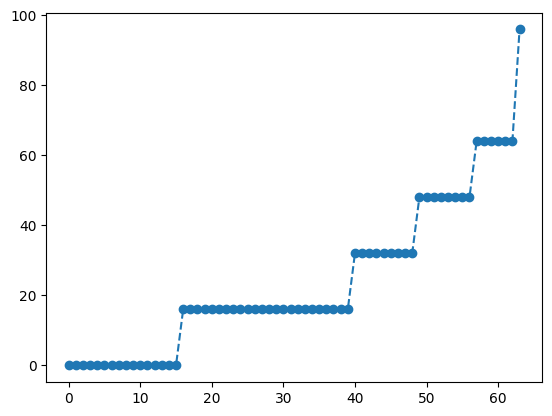

In [9]:
two_steps_mat = np.linalg.matrix_power(mat, 2)
sort_idx = np.argsort(np.diag(two_steps_mat))

plt.plot(np.diag(two_steps_mat[sort_idx, :][:, sort_idx]), linestyle="--", marker="o")
plt.show()

In [10]:
np.unique(np.diag(two_steps_mat), return_counts=True)

(array([ 0., 16., 32., 48., 64., 96.]), array([16, 24,  9,  8,  6,  1]))

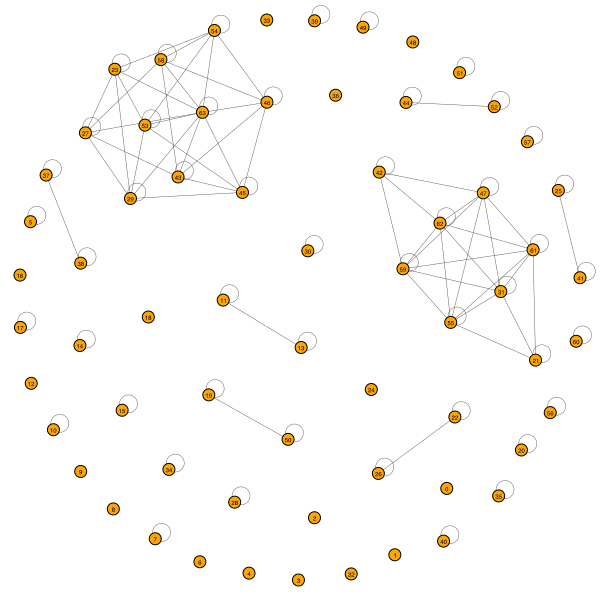

In [11]:
# two_steps_mat = two_steps_mat - np.diagflat(np.diag(two_steps_mat))
g = nx.from_numpy_array(two_steps_mat)
ig = igraph.Graph.from_networkx(g)
ig.vs["label"] = [str(i) for i in range(ig.vcount())]
color = ["whitesmoke" for i in range(ig.vcount())]
highlight = [
]
highlight_color = [
    # "aqua",
    # "deepskyblue",
    # "yellowgreen",
    # "tomato",
    # "royalblue"
]
for i, nodes in enumerate(highlight):
    for node in nodes:
        color[node] = highlight_color[i]
ig.vs["color"] = color
# sub_ig = ig.induced_subgraph(np.where(np.diag(two_steps_mat) == 48)[0])
igraph.plot(
    ig,
    layout=ig.layout_kamada_kawai(),
    vertex_size=12,
    vertex_color="orange",
    edge_width=0.4,
    # edge_color="darkgray",
    vertex_label_size=6,
    inline=True
)

In [12]:
# sub_g = nx.induced_subgraph(g, np.where(np.diag(two_steps_mat) == 48)[0])
sub_components = list(g.subgraph(c) for c in nx.connected_components(g))

nullity = []
for c in sub_components:
    # print(nx.is_bipartite(c))
    cmat = nx.to_numpy_array(c)
    # cmat = cmat - np.diagflat(np.diag(cmat))
    nullity.append(cmat.shape[0] - np.linalg.matrix_rank(cmat))
    
np.unique(nullity, return_counts=True)

(array([0, 1, 3]), array([18, 23,  1]))

# Ising model

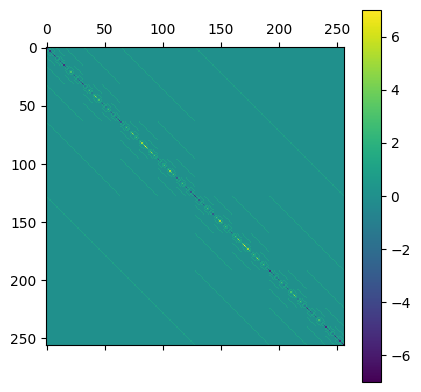

In [13]:
mat = ising_model(8, 1)
assert ishermitian(mat)

plt.matshow(mat)
plt.colorbar()

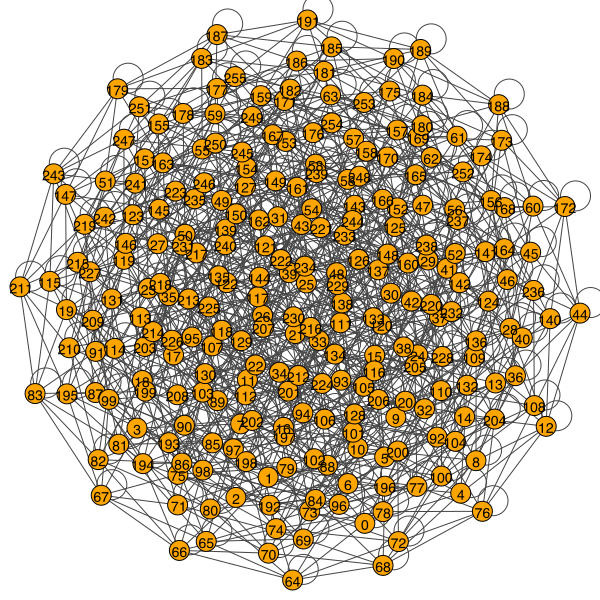

In [14]:
g = nx.from_numpy_array(mat)
ig = igraph.Graph.from_networkx(g)
ig.vs["label"] = [str(i) for i in range(ig.vcount())]
igraph.plot(
    ig,
    layout=ig.layout_kamada_kawai(),
    # vertex_size=8,
    vertex_color="orange",
    # edge_width=0.4,
    # edge_color="darkgray",
    # vertex_label_size=6,
    inline=True
)

In [15]:
import numpy as np
from scipy.linalg import eig

n = 6
A = np.random.random((n, n))
A = (A + A.T) / 2
B = np.random.random((n, n))
B = (B + B.T) / 2

In [16]:
evals, left_evecs, right_evecs = eig((B @ B @ A + B), b=B @ B, left=True, right=True)
np.real_if_close(evals)

array([ 14.26246953, -10.8217393 ,  -2.56972014,   0.94314784,
         2.34084653,   3.14140687])

In [17]:
B.T @ B.T @ left_evecs

array([[-7.32781367e-04,  1.64044896e-03, -3.20913629e-02,
         1.03019941e-01,  1.28521959e-01, -5.09032601e-03],
       [-1.18373483e-03, -1.00033890e-04,  1.14220459e-01,
        -5.97266074e-02,  5.71648887e-02, -4.11829572e-02],
       [-1.85610496e-03,  3.28852717e-03, -5.30153850e-02,
        -3.71457391e-02, -3.31280130e-02, -8.87849725e-02],
       [ 2.10529885e-03, -7.45939513e-04,  3.69357452e-02,
         1.24520788e-01, -3.88663048e-02, -7.05414779e-02],
       [ 3.16076899e-03, -8.59551106e-04, -3.78651754e-02,
        -9.98151261e-02,  6.29557642e-02, -3.75670274e-02],
       [-1.64747350e-03, -6.96508715e-03, -3.35124984e-02,
         6.56561685e-03,  1.02010402e-02, -3.03358828e-02]])

In [18]:
right_evecs

array([[-0.15441446,  0.20614906, -0.22247128,  0.50833447,  0.79008179,
        -0.03914204],
       [-0.24944107, -0.01257088,  0.79182587, -0.29471084,  0.35141806,
        -0.31667614],
       [-0.39112545,  0.41325685, -0.3675257 , -0.18328937, -0.20365267,
        -0.68271159],
       [ 0.44363652, -0.09373942,  0.25605464,  0.61442676, -0.23892851,
        -0.54242834],
       [ 0.66604918, -0.10801656, -0.26249786, -0.49252085,  0.38701715,
        -0.28887147],
       [-0.34716184, -0.87527633, -0.23232321,  0.03239693,  0.06271034,
        -0.23326762]])

In [19]:
np.real_if_close(left_evecs.T @ B @ B @ right_evecs)

array([[ 4.74554898e-03, -9.76309034e-18,  6.98786880e-17,
        -2.31805091e-16,  9.15497150e-16, -1.04099135e-15],
       [ 1.05562326e-17,  7.95758653e-03, -1.08322339e-16,
         1.32749476e-16,  5.60259852e-17, -2.04373930e-16],
       [-6.50152900e-17,  1.55408876e-17,  1.44249465e-01,
        -1.72445906e-16,  2.65667241e-16, -3.60350296e-16],
       [-5.31575115e-17,  2.46498625e-17, -2.24901177e-16,
         2.02661726e-01, -4.80477574e-16,  5.43488558e-16],
       [ 3.04294677e-16,  7.89100354e-17, -3.99095740e-16,
         5.28713423e-16,  1.62669182e-01, -7.27624554e-16],
       [ 1.70718129e-17,  1.06921212e-16, -2.61843800e-16,
         4.97130610e-16, -1.67560150e-16,  1.30047553e-01]])

In [20]:
evals, left_evecs, right_evecs = eig(A + np.linalg.pinv(B), left=True, right=True)
np.real_if_close(evals)

array([ 14.26246953, -10.8217393 ,  -2.56972014,   0.94314784,
         2.34084653,   3.14140687])

In [21]:
right_evecs

array([[ 0.15441446,  0.20614906, -0.22247128, -0.50833447, -0.79008179,
         0.03914204],
       [ 0.24944107, -0.01257088,  0.79182587,  0.29471084, -0.35141806,
         0.31667614],
       [ 0.39112545,  0.41325685, -0.3675257 ,  0.18328937,  0.20365267,
         0.68271159],
       [-0.44363652, -0.09373942,  0.25605464, -0.61442676,  0.23892851,
         0.54242834],
       [-0.66604918, -0.10801656, -0.26249786,  0.49252085, -0.38701715,
         0.28887147],
       [ 0.34716184, -0.87527633, -0.23232321, -0.03239693, -0.06271034,
         0.23326762]])

In [22]:
left_evecs

array([[ 0.15441446,  0.20614906, -0.22247128, -0.50833447, -0.79008179,
         0.03914204],
       [ 0.24944107, -0.01257088,  0.79182587,  0.29471084, -0.35141806,
         0.31667614],
       [ 0.39112545,  0.41325685, -0.3675257 ,  0.18328937,  0.20365267,
         0.68271159],
       [-0.44363652, -0.09373942,  0.25605464, -0.61442676,  0.23892851,
         0.54242834],
       [-0.66604918, -0.10801656, -0.26249786,  0.49252085, -0.38701715,
         0.28887147],
       [ 0.34716184, -0.87527633, -0.23232321, -0.03239693, -0.06271034,
         0.23326762]])